In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ghg_data_sample.csv')
df.head()

,Month,Electricity_kWh,NaturalGas_therms,Water_gal
0,Jan,1200,80,4000
1,Feb,1100,75,3900
2,Mar,1000,70,3800
3,Apr,950,60,3700


In [7]:
# Standard emission factors (kg CO₂e per unit)
EF = {
    'Electricity': 0.417,   # kg CO₂e per kWh
    'NaturalGas': 5.3,      # kg CO₂e per therm
    'Water': 0.0015         # kg CO₂e per gallon
}

# Calculate emissions
df['Electricity_emissions'] = df['Electricity_kWh'] * EF['Electricity']
df['Gas_emissions']         = df['NaturalGas_therms'] * EF['NaturalGas']
df['Water_emissions']       = df['Water_gal'] * EF['Water']

# Sum to get total emissions per month
df['Total_emissions_kg'] = (
    df['Electricity_emissions'] +
    df['Gas_emissions'] +
    df['Water_emissions']
)

df

,Month,Electricity_kWh,NaturalGas_therms,Water_gal,Electricity_emissions,Gas_emissions,Water_emissions,Total_emissions_kg
0,Jan,1200,80,4000,500.40,424.0,6.00,930.40
1,Feb,1100,75,3900,458.70,397.5,5.85,862.05
2,Mar,1000,70,3800,417.00,371.0,5.70,793.70
3,Apr,950,60,3700,396.15,318.0,5.55,719.70


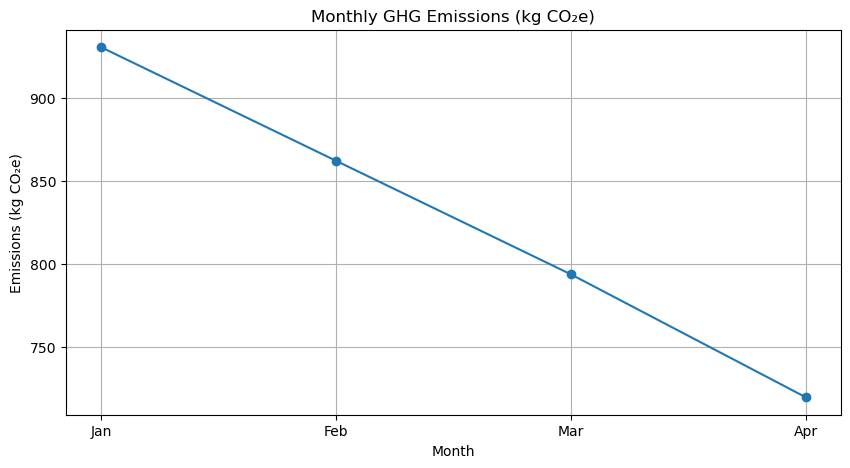

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Total_emissions_kg'], marker='o')
plt.title('Monthly GHG Emissions (kg CO₂e)')
plt.xlabel('Month')
plt.ylabel('Emissions (kg CO₂e)')
plt.grid(True)

# Save the plot image
plt.savefig('emissions_plot.png')
plt.show()
